In [1]:
import numpy as np
import pandas as pd

In [2]:
cuisine = pd.read_csv('cuisine_dataset.csv')
cuisine.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Determine the percentage of restaurants that offer online delivery. 

In [3]:
cuisine.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
cuisine["Has Online delivery"]

0       No
1       No
2       No
3       No
4       No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Has Online delivery, Length: 9551, dtype: object

In [5]:
cuisine['Has Online delivery'] = cuisine['Has Online delivery'].replace({'Yes': 1, 'No': 0})



In [6]:
cuisine['Has Online delivery']

0       0
1       0
2       0
3       0
4       0
       ..
9546    0
9547    0
9548    0
9549    0
9550    0
Name: Has Online delivery, Length: 9551, dtype: int64

In [9]:
import matplotlib.pyplot as plt

Percentage of restaurants that offer online delivery: 25.66%


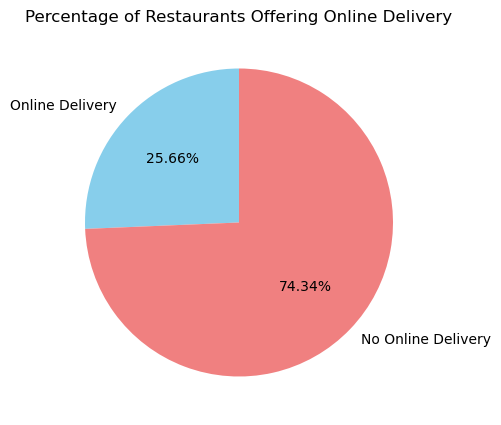

In [10]:
total_restaurants = len(cuisine)
restaurants_with_online_delivery = cuisine['Has Online delivery'].sum()
percentage_online_delivery = (restaurants_with_online_delivery / total_restaurants) * 100

# Display the percentage value
print(f"Percentage of restaurants that offer online delivery: {percentage_online_delivery:.2f}%")

# Plotting a pie chart
labels = ['Online Delivery', 'No Online Delivery']
sizes = [percentage_online_delivery, 100 - percentage_online_delivery]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Percentage of Restaurants Offering Online Delivery')
plt.show()


## Compare the average ratings of restaurants with and without online delivery.

Average Rating for Restaurants with Online Delivery: 3.25
Average Rating for Restaurants without Online Delivery: 2.47


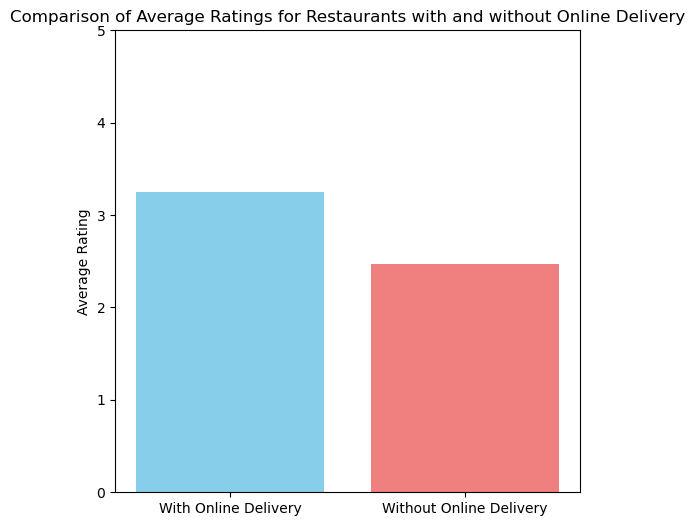

In [11]:
# Calculate the average rating for restaurants with online delivery
average_rating_online_delivery = cuisine[cuisine['Has Online delivery'] == 1]['Aggregate rating'].mean()

# Calculate the average rating for restaurants without online delivery
average_rating_no_online_delivery = cuisine[cuisine['Has Online delivery'] == 0]['Aggregate rating'].mean()

# Display the average ratings
print(f"Average Rating for Restaurants with Online Delivery: {average_rating_online_delivery:.2f}")
print(f"Average Rating for Restaurants without Online Delivery: {average_rating_no_online_delivery:.2f}")

# Plotting a bar chart
labels = ['With Online Delivery', 'Without Online Delivery']
average_ratings = [average_rating_online_delivery, average_rating_no_online_delivery]

plt.figure(figsize=(6, 6))
plt.bar(labels, average_ratings, color=['skyblue', 'lightcoral'])
plt.ylabel('Average Rating')
plt.title('Comparison of Average Ratings for Restaurants with and without Online Delivery')
plt.ylim(0, 5)  # Assuming the ratings are on a scale from 0 to 5
plt.show()
